# Regresión Lineal Múltiple
## Machine Learning con Python

In [1]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# leer el archivo de datos
df = pd.read_csv('50_Startups.csv')

In [7]:
df.head(10)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96

In [8]:
df.tail(3)

R&D Spend  Administration  Marketing Spend       State    Profit
47       0.00       135426.92             0.00  California  42559.73
48     542.05        51743.15             0.00    New York  35673.41
49       0.00       116983.80         45173.06  California  14681.40

In [25]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [62]:
StateDummy = pd.get_dummies(df['State'])

In [68]:
df2 = df.join(StateDummy).drop(['State', 'Florida'], axis=1)

In [69]:
df2.head()

R&D Spend  Administration  Marketing Spend     Profit  California  New York
0  165349.20       136897.80        471784.10  192261.83           0         1
1  162597.70       151377.59        443898.53  191792.06           1         0
2  153441.51       101145.55        407934.54  191050.39           0         0
3  144372.41       118671.85        383199.62  182901.99           0         1
4  142107.34        91391.77        366168.42  166187.94           0         0

In [91]:
df2.describe()

R&D Spend  Administration  Marketing Spend         Profit  \
count      50.000000       50.000000        50.000000      50.000000   
mean    73721.615600   121344.639600    211025.097800  112012.639200   
std     45902.256482    28017.802755    122290.310726   40306.180338   
min         0.000000    51283.140000         0.000000   14681.400000   
25%     39936.370000   103730.875000    129300.132500   90138.902500   
50%     73051.080000   122699.795000    212716.240000  107978.190000   
75%    101602.800000   144842.180000    299469.085000  139765.977500   
max    165349.200000   182645.560000    471784.100000  192261.830000   

       California   New York  
count   50.000000  50.000000  
mean     0.340000   0.340000  
std      0.478518   0.478518  
min      0.000000   0.000000  
25%      0.000000   0.000000  
50%      0.000000   0.000000  
75%      1.000000   1.000000  
max      1.000000   1.000000

In [80]:
X = df2.iloc[:, [0, 1, 2, -1, -2]].values
y = df2.iloc[:, 3].values

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
df2.corr()

R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend         1.000000        0.241955         0.724248  0.972900   
Administration    0.241955        1.000000        -0.032154  0.200717   
Marketing Spend   0.724248       -0.032154         1.000000  0.747766   
Profit            0.972900        0.200717         0.747766  1.000000   
California       -0.143165       -0.015478        -0.168875 -0.145837   
New York          0.039068        0.005145        -0.033670  0.031368   

                 California  New York  
R&D Spend         -0.143165  0.039068  
Administration    -0.015478  0.005145  
Marketing Spend   -0.168875 -0.033670  
Profit            -0.145837  0.031368  
California         1.000000 -0.515152  
New York          -0.515152  1.000000

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
regressor.coef_

array([7.73467193e-01, 3.28845975e-02, 3.66100259e-02, 1.65865321e+03,
       9.59284160e+02])

In [86]:
regressor.intercept_

41594.88345830598

$y = 7.7e-01x_1 + 3.3e-02x_2 + 3.7e-02x_3 + 1.7e03x_4 + 9.6e02x_5 + 41594.9$

In [87]:
regressor.score(X_train, y_train)

0.9501847627493607

In [88]:
y_pred = regressor.predict(X_test)

In [90]:
regressor.score(X_test, y_test)

0.9347068473300781

In [96]:
x_1 = np.arange(0, 200000, 1)
y = 7.73467193e-01*x + 41594.88345830598

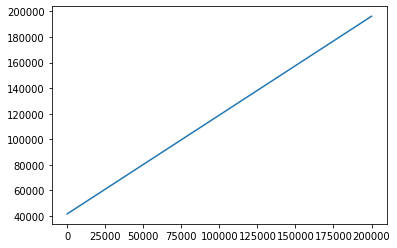

In [98]:
plt.plot(x_1,y);